In [ ]:
## Bibliothèques générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

"## Bibliothèques de cartographie et d'analyse spatiale\nimport geopandas as gpd\nimport folium\nfrom folium import plugins\n\n## API de données\nimport wbgapi as wb"

In [ ]:
## importation des fichiez zip

In [ ]:
import pandas as pd
import os
import zipfile
from google.colab import files

# Téléversement du fichier ZIP
print("➡️ Téléversez le fichier ZIP contenant les fichiers .xlsx…")
zip_filename = list(files.upload().keys())[0]

# Extraction du ZIP
input_dir = "extracted_files"
os.makedirs(input_dir, exist_ok=True)
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(input_dir)

# Liste des fichiers Excel extraits
excel_files = [
    os.path.join(root, file)
    for root, _, files_ in os.walk(input_dir)
    for file in files_
    if file.lower().endswith(".xlsx")
]

if not excel_files:
    raise Exception("❌ Aucun fichier .xlsx trouvé dans le dossier.")

# Liste pour stocker les DataFrames extraits
dfs = []

# Parcours des fichiers Excel
for file_path in excel_files:
    # Chargement du fichier Excel
    df = pd.read_excel(file_path)
    df = df.rename(columns={"Nom du fichier": "Pays", "Date EDAT": "Date"})
    df['Pays'] = df['Pays'].replace('South Africa1', 'South Africa')

    # Vérifier que les colonnes existent, sinon ignorer le fichier
    cols_to_select = ["Pays", "PMID", "Date"]
    if all(col in df.columns for col in cols_to_select):
        # Sélection des colonnes
        df_selected = df[cols_to_select]
        dfs.append(df_selected)
    else:
        print(f"⚠️ Fichier {file_path} ignoré car il ne contient pas toutes les colonnes requises.")

# Fusion de tous les DataFrames en un seul
merged_df = pd.concat(dfs, ignore_index=True)
# Affichage ou sauvegarde du résultat
print(merged_df.sample(5))

➡️ Téléversez le fichier ZIP contenant les fichiers .xlsx…


Saving fichiers_virus_annotés_step4.zip to fichiers_virus_annotés_step4.zip
           Pays      PMID        Date
36590    Uganda  27808114  2016/11/04
41142     Kenya  26996461  2016/03/22
54540     Egypt  31688311  2019/11/07
48509   Nigeria  15827591  2005/04/14
6371   Ethiopia  32462003  2020/05/29


In [ ]:
from datetime import datetime
#print(merged_df.dtypes)
data_original=merged_df.copy()
# Conversion de la colonne 'Date' en datetime
data_original["Date"] = pd.to_datetime(data_original["Date"], format="%Y/%m/%d")
data_original["year"]=data_original["Date"].dt.year


In [ ]:
# Nettoyage  de Données
data_original['Pays'] =data_original['Pays'].replace('South Africa1', 'South Africa')

corrections_pays = {
    "Guine Bissau": "Guinea-Bissau",
    "Ivory Coast": "Côte d'Ivoire",
    'S╞o Tomé and Príncipe': 'Sao Tome and Principe'
}

# Remplacement dans la colonne "Pays"
data_original["Pays"] = data_original["Pays"].replace(corrections_pays)

# selectons des années
data_original = data_original[(data_original["year"] < 2025) & (data_original["year"] > 1940)]


In [ ]:
 # Compter les occurrences des pays
 article_par_pays = data_original["Pays"].value_counts().reset_index()
article_par_pays.columns = ['Pays', 'numbers of article']

article_par_pays.sample(3)

,Pays,numbers of article
25,Gambia,515
22,Mozambique,633
11,Congo,1297


In [ ]:
## Graph sur les  nombres de  publications par pays
article_par_pays = article_par_pays.sort_values("numbers of article", ascending=False)

### Création du graphique
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=article_par_pays,
    y="Pays",
    x="numbers of article",
    palette="plasma",
    width=0.8,
    gap=0.5,
)

# Ajouter les valeurs à la fin de TOUTES les barres
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%d",
        padding=4,
        fontsize=10,

    )

# Labels des axes
ax.set_xlabel("Nombre d'articles", fontsize=12)
ax.set_ylabel("Pays", fontsize=12)
plt.title("Nombre d'articles sur les virus publiés par pays africain ", fontsize=14, pad=20)

#spprimers les barre bord des figuire
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

/tmp/ipython-input-168-905276446.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




In [ ]:
# Barplot pour les articles par année


article_par_year = data_original["year"].value_counts().reset_index()

# Renommer correctement les colonnes
article_par_year.columns = ['year', 'numbers of article']
article_par_year = article_par_year.sort_values('year')

#article_par_year.sample(5)


In [ ]:
# Evolution par Decenies
## Ajouter une colonne "decade" à partir de "year" et half_decade
article_par_year["decade"] = (article_par_year["year"] // 10) * 10


/tmp/ipython-input-54-2249211898.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=article_par_decade, x="decade", y="numbers of article", palette="crest",errorbar=None, ax=ax)


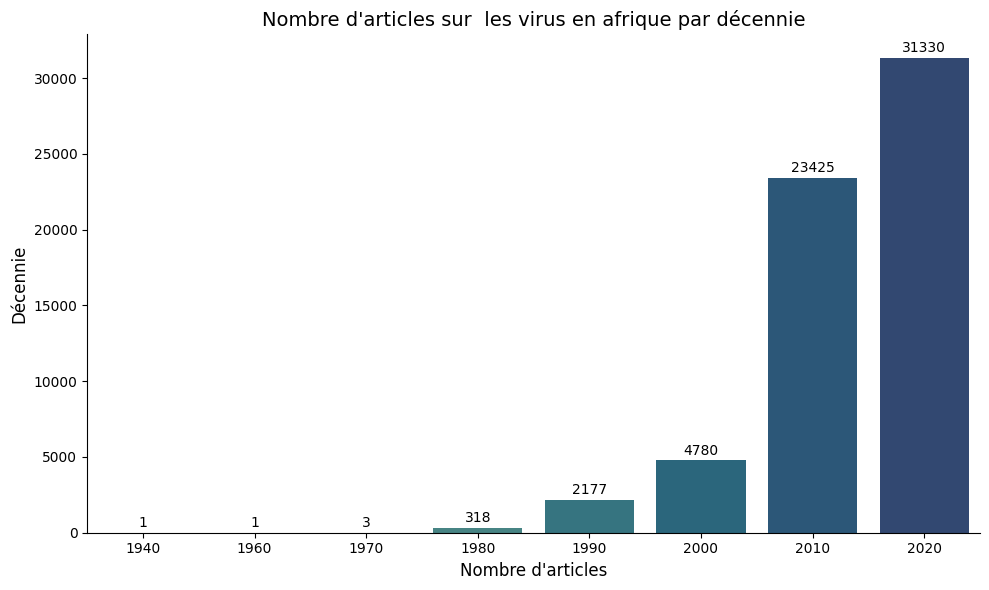

In [ ]:
# Grouper par décennie et faire la somme des articles
article_par_decade = article_par_year.groupby("decade", as_index=False)["numbers of article"].sum()
article_par_decade = article_par_decade.sort_values("decade")

# 🎨 Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adapté aux décennies
sns.barplot(data=article_par_decade, x="decade", y="numbers of article", palette="crest",errorbar=None, ax=ax)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2, fontsize=10, color="black")
ax.set_xlabel("Nombre d'articles", fontsize=12)
ax.set_ylabel("Décennie", fontsize=12)
ax.set_title("Nombre d'articles sur  les virus en afrique par décennie", fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
## Nombre  d'article par 1/2 decenie
article_par_year['half_decade'] = (article_par_year['year'] // 5) * 5

In [ ]:
article_by_half_decade.head(3)

,year,numbers of article,decade,half_decade
46,1946,1,1940,1945
45,1968,1,1960,1965
39,1976,3,1970,1975


/tmp/ipython-input-57-1152787550.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(article_by_half_decade , x="half_decade", y="numbers of article",  palette="crest", errorbar=None, ax=ax)


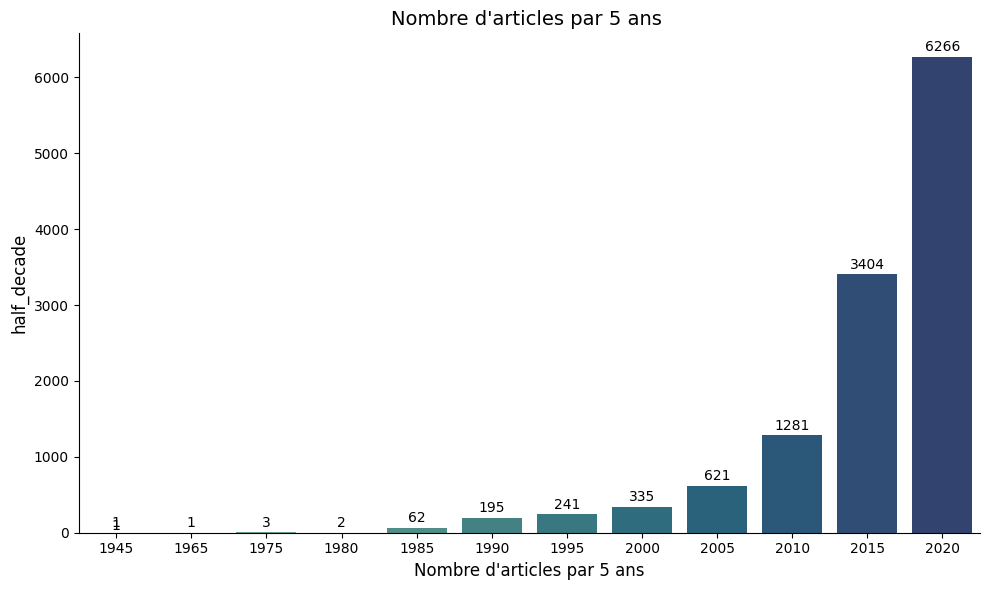

In [ ]:
# ➕ Grouper par décennie et faire la somme des articles

article_by_half_decade = article_par_year.groupby("half_decade", as_index=False)["numbers of article"].sum()

article_by_half_decade= article_par_year.sort_values("half_decade")

# 🎨 Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# 📊 Barplot horizontal
sns.barplot(article_by_half_decade , x="half_decade", y="numbers of article",  palette="crest", errorbar=None, ax=ax)
ax.bar_label(ax.containers[0], fontsize=10)

# 🏷️ Ajouter les valeurs à la fin des barres
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2, fontsize=10, color="black", fmt='%.0f')

# 📝 Étiquettes et titre
ax.set_xlabel("Nombre d'articles par 5 ans", fontsize=12)
ax.set_ylabel("half_decade", fontsize=12)
ax.set_title("Nombre d'articles par 5 ans ", fontsize=14)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ✅ Affichage
plt.tight_layout()
plt.show()

In [ ]:
# Grouper par demi-décennie et faire la somme des articles
article_by_half_decade = article_par_year.groupby("half_decade", as_index=False)["numbers of article"].sum()
article_by_half_decade = article_by_half_decade.sort_values("half_decade")

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barplot horizontal avec couleur unie (pas de palette pour éviter warning)
sns.barplot(data=article_by_half_decade,
            x="numbers of article", y="half_decade",
            color="skyblue",
            errorbar=None, ax=ax)

# Ajouter les valeurs au bout des barres
ax.bar_label(ax.containers[0], fontsize=10)

# Ajouter un line plot superposé avec un second axe x
ax2 = ax.twiny()  # axe x secondaire en haut

ax2.plot(article_by_half_decade["numbers of article"],
         article_by_half_decade["half_decade"],
         color="red", marker="o", linewidth=2)

# Etiquettes pour le second axe x
ax2.set_xlabel("Nombre d'articles (ligne)", fontsize=12)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(axis='x', colors='red')

# Configuration axe principal
ax.set_xlabel("Nombre d'articles par 5 ans", fontsize=12)
ax.set_ylabel("Demi-décennie", fontsize=12)
ax.set_title("Nombre d'articles par 5 ans", fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Evolution des publication apres  la  pandemie

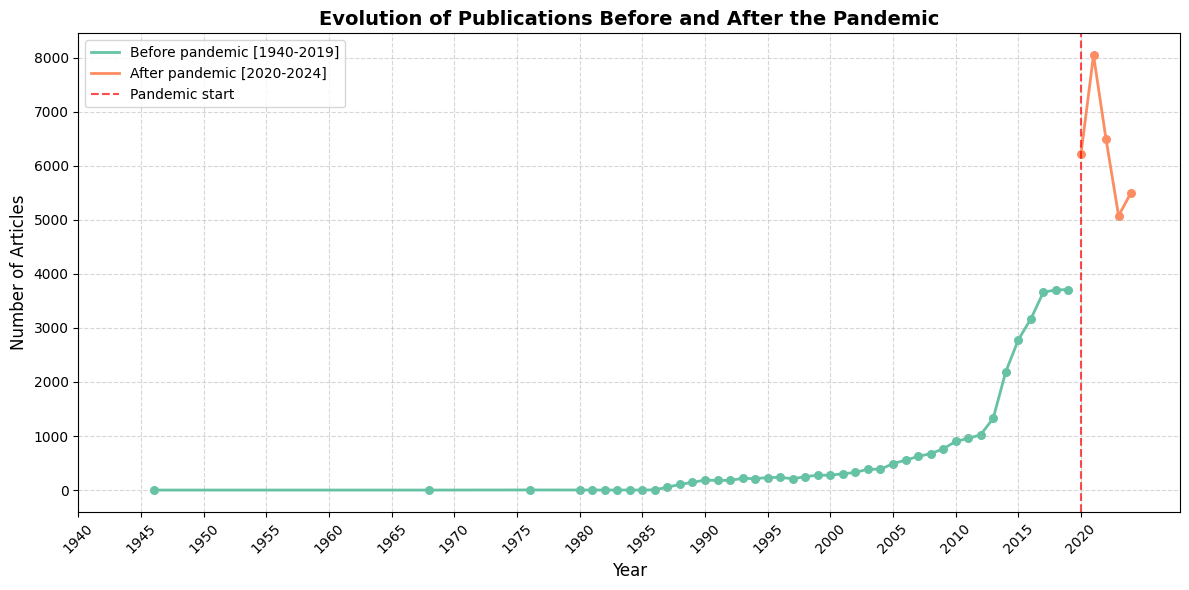

In [ ]:
# Ajout de la colonne 'pandemie'
article_par_year["pandemie"] = np.where(article_par_year["year"] < 2020, "Before pandemic", "After pandemic")

# Création du graph  en line
plt.figure(figsize=(12, 6))

# Ligne pour Before pandemic
before = article_par_year[article_par_year["pandemie"] == "Before pandemic"]
plt.plot(before["year"], before["numbers of article"],
         color='#66c2a5', label='Before pandemic [1940-2019]', linewidth=2)

# Ligne pour After pandemic
after = article_par_year[article_par_year["pandemie"] == "After pandemic"]
plt.plot(after["year"], after["numbers of article"],
         color='#fc8d62', label='After pandemic [2020-2024]', linewidth=2)

# Ajouter une ligne verticale pour 2020
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7, label='Pandemic start')

# Ajouter des points pour chaque année
plt.scatter(before["year"], before["numbers of article"], color='#66c2a5', s=30)
plt.scatter(after["year"], after["numbers of article"], color='#fc8d62', s=30)

# Titres et labels
plt.title("Evolution of Publications Before and After the Pandemic", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Légende
plt.legend(fontsize=10)

# Ajuster les ticks de l'axe x
plt.xticks(np.arange(1940, 2025, 5), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
## Observation sur les  pays

In [ ]:
%pip install pycountry
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.3 MB/s eta 0:00:00


In [ ]:
## Distribution par pays

In [ ]:
article_by_year_contry=article_par_pays

In [ ]:
import pycountry

# Obtenir la liste des noms officiels des pays en anglais
pycountry_names = set([country.name for country in pycountry.countries])

# Ajouter les noms courants (common_name), noms officiels (official_name), etc.
for country in pycountry.countries:
    if hasattr(country, 'official_name'):
        pycountry_names.add(country.official_name)
    if hasattr(country, 'common_name'):
        pycountry_names.add(country.common_name)

# Vérifier les pays non reconnus dans ta colonne "Pays"
pays_non_reconnus = set()

for nom in article_by_year_contry['Pays'].unique():
    if nom not in pycountry_names:
        pays_non_reconnus.add(nom)

# Afficher les noms de pays non reconnus

if len(pays_non_reconnus) > 0:
    print("Pays non reconnus par pycountry :")
    for nom in sorted(pays_non_reconnus):
        print("\t-", nom)
else:
    print("Tous les pays sont reconnus par pycountry")





Tous les pays sont reconnus par pycountry


In [ ]:
article_by_country=article_by_year_contry


import pycountry

def country_name_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# Ajouter la colonne avec le code ISO3 du pays
article_by_country['country'] = article_by_country['Pays'].apply(country_name_to_iso3)

# Afficher les lignes où la conversion en code ISO3 a échoué
lignes_avec_na = article_by_country[article_by_country['country'].isna()]

print(lignes_avec_na)




Empty DataFrame
Columns: [Pays, year, numbers of article, country, Pandemie]
Index: []


In [ ]:
article_by_country.loc[article_by_country["Pays"] == "Congo", "country"] = "COD"

In [ ]:
article_by_country[article_by_country["country"]=="COD"]

,Pays,year,numbers of article,country,Pandemie
209,Congo,1987,1,COD,Before
210,Congo,1990,2,COD,Before
211,Congo,1991,3,COD,Before
212,Congo,1992,3,COD,Before
213,Congo,1993,3,COD,Before
214,Congo,1994,2,COD,Before
215,Congo,1995,2,COD,Before
216,Congo,1996,1,COD,Before
217,Congo,1997,2,COD,Before
218,Congo,1998,3,COD,Before


In [ ]:
import pandas as pd
import plotly.express as px


# Trier les données
article_by_country_color=article_by_country.groupby(["country","Pays"],as_index=False).sum("numbers of article")
article_by_country_color = article_by_country_color.sort_values(by="numbers of article", ascending=False)

# Définir les min et max pour contrôler l’échelle (ex : entre 0 et 100)
vmin =5
vmax = 1000  # adapte selon tes données

fig = px.choropleth(
    article_by_country_color,
    locations="country",  # codes ISO alpha-3
    color="numbers of article",
    color_continuous_scale=px.colors.sequential.Blues,  # ou RdYlGn, etc.
    range_color=(vmin, vmax),
    scope="africa",
    labels={"numbers of article": "Nombre d'articles","country":"Pays" },
    title="Nombre d'articles sur  les virus par pays africain"

)

fig.update_layout(coloraxis_colorbar=dict(title="Articles"))

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Regrouper et trier les données
article_by_country_color = article_by_country.groupby(["country", "Pays"], as_index=False).sum("numbers of article")
article_by_country_color = article_by_country_color.sort_values(by="numbers of article", ascending=False)

# Définir les bornes de l'échelle de couleurs
vmin = 5
vmax = 1000  # adapte à tes données réelles

# Création de la carte choroplèthe
fig = px.choropleth(
    article_by_country_color,
    locations="country",                   # codes ISO alpha-3
    color="numbers of article",
    hover_name="Pays",                     # affiche les noms complets des pays au survol
    color_continuous_scale=px.colors.sequential.Blues,
    range_color=(vmin, vmax),
    scope="africa",                        # limite la carte au continent africain
    labels={
        "numbers of article": "Nombre d'articles"

    },
    title="Nombre d'articles sur les virus par pays africain"
)

# Mise en forme de la légende
fig.update_layout(coloraxis_colorbar=dict(title="Articles"))

fig.show()


In [ ]:
article_by_year_contry.columns

Index(['Pays', 'year', 'numbers of article', 'country'], dtype='object')

In [ ]:
import plotly.express as px
article_by_year_contry = data_original.groupby(["Pays", "year"]).size().reset_index(name="numbers of article").sort_values("year")
article_by_year_contry.loc[article_by_year_contry["Pays"] == "Congo", "country"] = "COD"

def country_name_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# Ajouter la colonne avec le code ISO3 du pays
article_by_year_contry['country'] = article_by_year_contry['Pays'].apply(country_name_to_iso3)

# Afficher les lignes où la conversion en code ISO3 a échoué
lignes_avec_na = article_by_year_contry[article_by_year_contry['country'].isna()]

print(lignes_avec_na)


fig = px.choropleth(
    article_by_year_contry,
    locations="country",            # colonne des codes ISO alpha-3
    color="numbers of article",     # variable à colorer
    hover_name="Pays",              # nom affiché au survol
    color_continuous_scale=px.colors.sequential.Plasma,
    scope="africa",                 # limiter à l'Afrique si tu veux
    animation_frame="year",
    labels={"numbers of article": "Nombre d'articles"},
    title="Number of articles per African country per year",
    range_color=[20,80]
)

fig.show()


Empty DataFrame
Columns: [Pays, year, numbers of article, country]
Index: []


In [ ]:
article_by_year_contry[article_by_year_contry["Pays"]=="Congo"].head(1)

,Pays,year,numbers of article,country
209,Congo,1987,1,COG


In [ ]:
fig = px.choropleth(
    article_by_year_contry,
    locations="country",
    color="numbers of article",
    hover_name="Pays",
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame="year",
    labels={"numbers of article": "Nombre d'articles"},
    title="Nombre d'articles par pays africain et par an",
    range_color=[20, 80],
    scope="africa"  # Tu peux le garder ici si tu veux te limiter à l'Afrique
)

# ✅ Agrandir la taille de l'image affichée
fig.update_layout(
    width=1000,   # largeur en pixels
    height=800,   # hauteur en pixels
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


In [ ]:

article_by_year_contry["Pandemie"] = np.where(article_by_year_contry["year"] < 2020, "Before", "After")
article_by_year_contry.head()

,Pays,year,numbers of article,country,Pandemie
1099,South Africa,1946,1,ZAF,Before
1100,South Africa,1968,1,ZAF,Before
948,Nigeria,1976,3,NGA,Before
1101,South Africa,1980,2,ZAF,Before
1102,South Africa,1981,2,ZAF,Before


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
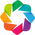

In [ ]:
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh','matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
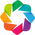

:Bars   [Pays,Pandemie]   (numbers of article)

In [ ]:
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')  # Ne pas inclure matplotlib ici sauf si tu veux du statique

# Exemple : on garde les 20 premiers pour un affichage lisible
df = article_by_year_contry

# Création d’un Bar plot avec grouping par "Pandemie"
bars = hv.Bars(df, kdims=["Pays", "Pandemie"], vdims="numbers of article")

# Personnalisation de l’affichage
bars.opts(
    opts.Bars(
        width=800,
        height=500,
        xlabel="Pays",
        ylabel="Nombre d'articles",
        legend_position='top_right',
        tools=['hover'],
        color='Pandemie',  # basé sur la colonne
        xrotation=45,
        stacked=False  # Mettre à True si tu veux empiler
    )
)


In [ ]:
https://python-graph-gallery.com/web-circular-barplot-with-matplotlib/  (pour les  mots des virus)
https://python-graph-gallery.com/circular-barplot/

https://d3-graph-gallery.com/arc.html
https://python-graph-gallery.com/300-draw-a-connection-line/
